In [40]:
from google.colab import files
uploaded = files.upload()

Saving final_truth_cleaned.csv to final_truth_cleaned (1).csv


In [41]:
import pandas as pd
data = pd.read_csv('final_truth_cleaned.csv')

In [42]:
data.drop(columns=['Gender', 'Social_Status'], inplace=True)
data.dropna(subset=['Age_Group'], inplace=True)


## *Data Eksploration*

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(data.head())

        User_ID App_Categories_Used  Browsing_Hours_Weekday  \
0 -9.219818e+18            Shopping                    3.39   
1 -9.218341e+18              Gaming                    5.69   
2 -9.216578e+18               Mixed                    2.74   
3 -9.209422e+18               Mixed                    2.09   
4 -9.203776e+18        Social Media                    6.38   

   Browsing_Hours_Weekend  Data_Usage_MB Device_Type Network_Type    Region  \
0                    7.93            454          pc           5g     rural   
1                    5.80           2740      tablet           4g     rural   
2                    2.34           4442          pc           4g  suburban   
3                    3.03           1084      tablet           5g     urban   
4                    9.20           2740          pc        wi-fi  suburban   

  Age_Group  
0     18-24  
1     18-24  
2     25-34  
3     45-54  
4     18-24  


In [45]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 10513 entries, 0 to 11153
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 10513 non-null  float64
 1   App_Categories_Used     10513 non-null  object 
 2   Browsing_Hours_Weekday  10513 non-null  float64
 3   Browsing_Hours_Weekend  10513 non-null  float64
 4   Data_Usage_MB           10513 non-null  int64  
 5   Device_Type             10513 non-null  object 
 6   Network_Type            10513 non-null  object 
 7   Region                  10513 non-null  object 
 8   Age_Group               10513 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 821.3+ KB
None
            User_ID  Browsing_Hours_Weekday  Browsing_Hours_Weekend  \
count  1.051300e+04            10513.000000            10513.000000   
mean   6.571608e+15                4.521223                5.492963   
std    5.450804e+18             

In [46]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 User_ID                   0
App_Categories_Used       0
Browsing_Hours_Weekday    0
Browsing_Hours_Weekend    0
Data_Usage_MB             0
Device_Type               0
Network_Type              0
Region                    0
Age_Group                 0
dtype: int64


*Visualisasi Data*

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Age Group Distribution

<ipython-input-48-f0e030a336a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Age_Group'], palette='Reds')


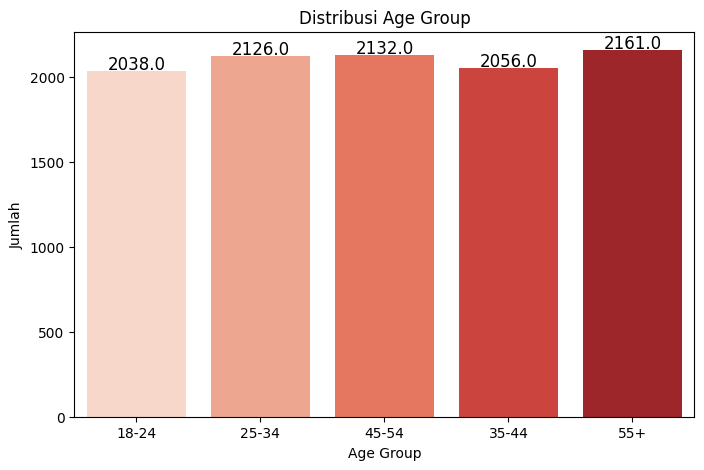

In [48]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=data['Age_Group'], palette='Reds')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Age Group')
plt.xlabel('Age Group')
plt.ylabel('Jumlah')
plt.show()


Connection between App Categories and Age

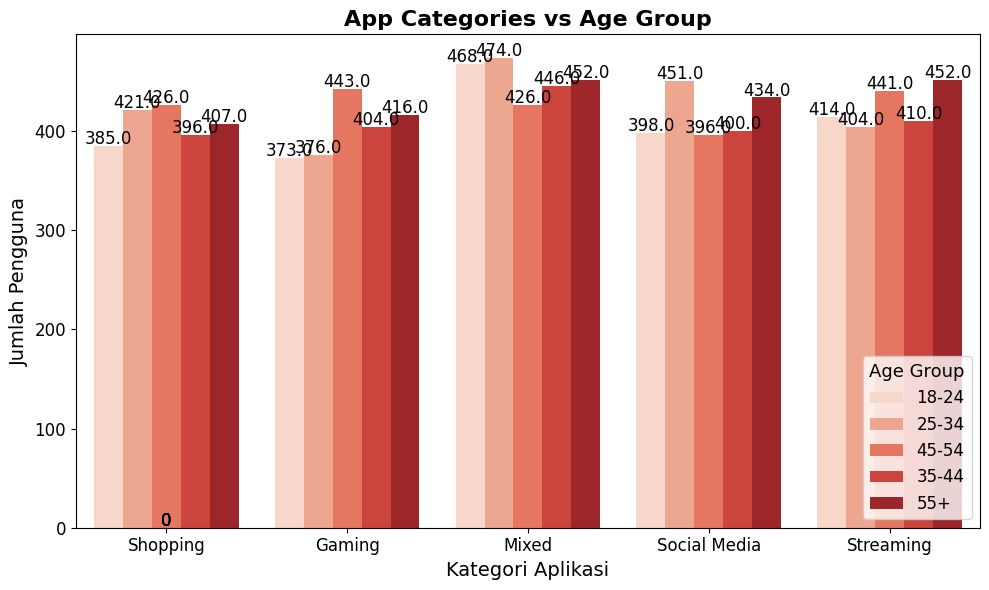

In [49]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x='App_Categories_Used', hue='Age_Group', palette='Reds')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('App Categories vs Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Kategori Aplikasi', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Age Group', title_fontsize=13, fontsize=12)
plt.tight_layout()
plt.show()


Connection between Device Type and age

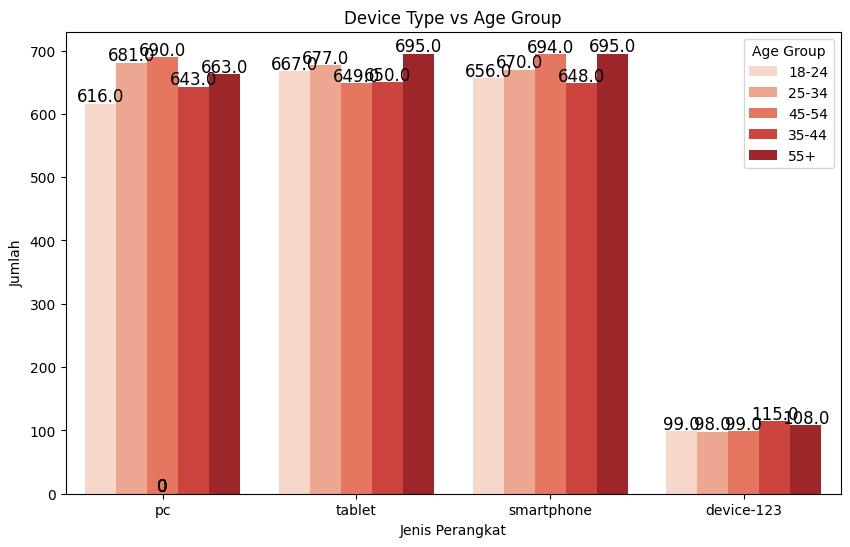

In [50]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x='Device_Type', hue='Age_Group', palette='Reds')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Device Type vs Age Group')
plt.xlabel('Jenis Perangkat')
plt.ylabel('Jumlah')
plt.legend(title='Age Group')
plt.show()


Connection between Network Type and Age

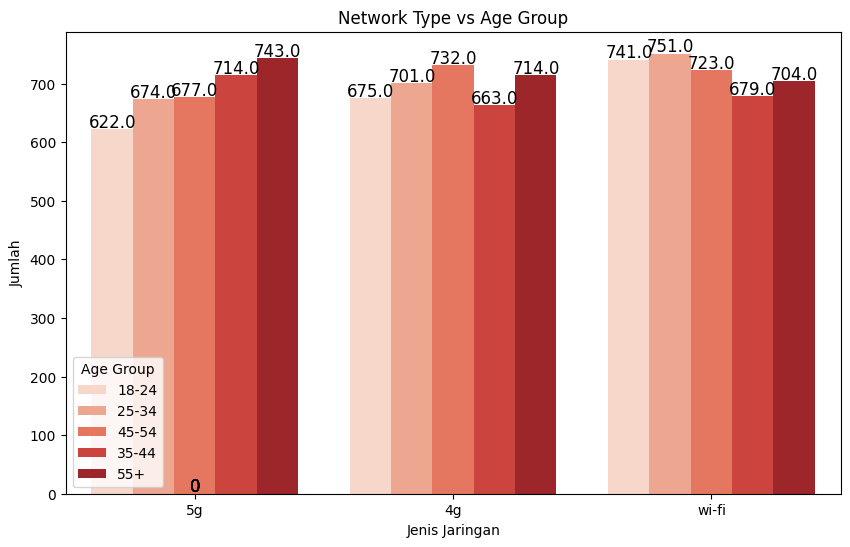

In [51]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x='Network_Type', hue='Age_Group', palette='Reds')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Network Type vs Age Group')
plt.xlabel('Jenis Jaringan')
plt.ylabel('Jumlah')
plt.legend(title='Age Group')
plt.show()


Connection between Region and age

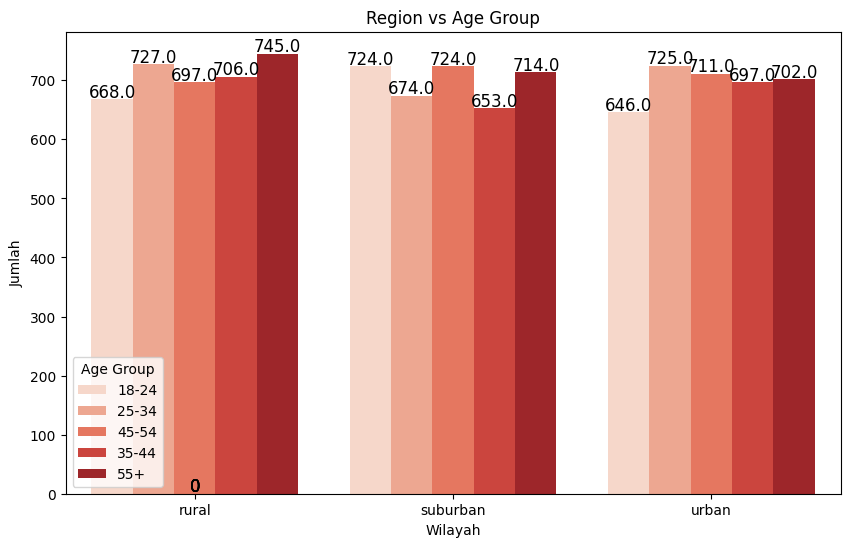

In [52]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x='Region', hue='Age_Group', palette='Reds')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Region vs Age Group')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.legend(title='Age Group')
plt.show()


Connection between Browsing Hours Weekday and Age

<ipython-input-70-b09e106026b8>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jumlah_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekday_Range']).size().reset_index(name='Jumlah Orang')


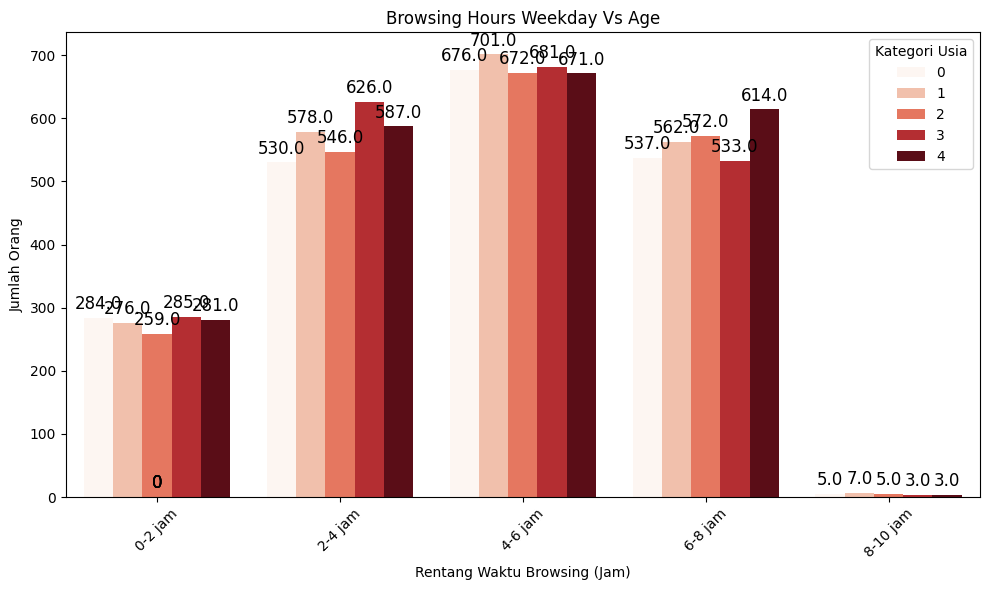

In [70]:
data['Browsing_Hours_Weekday'] = pd.to_numeric(data['Browsing_Hours_Weekday'], errors='coerce')
data = data.dropna(subset=['Browsing_Hours_Weekday'])

# Range waktu browsing
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2 jam','2-4 jam', '4-6 jam', '6-8 jam', '8-10 jam']
data['Browsing_Hours_Weekday_Range'] = pd.cut(data['Browsing_Hours_Weekday'], bins=bins, labels=labels)

jumlah_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekday_Range']).size().reset_index(name='Jumlah Orang')

# Visualisasi data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Browsing_Hours_Weekday_Range', y='Jumlah Orang', hue='Age_Group', palette='Reds', data=jumlah_per_kategori_dan_rentang)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Browsing Hours Weekday Vs Age')
plt.xlabel('Rentang Waktu Browsing (Jam)')
plt.ylabel('Jumlah Orang')
plt.legend(title='Kategori Usia', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
outliers = data[data['Browsing_Hours_Weekday'] >= 10]
jumlah_outliers_per_kategori = outliers.groupby('Age_Group').size()

# Menampilkan hasil jumlah orang per kategori usia
print("Jumlah Orang per Kategori Usia yang Memiliki Browsing Lebih dari 10 Jam:")
print(jumlah_outliers_per_kategori)

Jumlah Orang per Kategori Usia yang Memiliki Browsing Lebih dari 10 Jam:
Age_Group
0    6
1    2
2    2
3    4
4    5
dtype: int64


Mean Browsing Hours Weekday

<ipython-input-57-8719ebdea448>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rata_rata_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekday_Range'])['Browsing_Hours_Weekday'].mean().reset_index(name='Rata-rata Waktu Browsing')


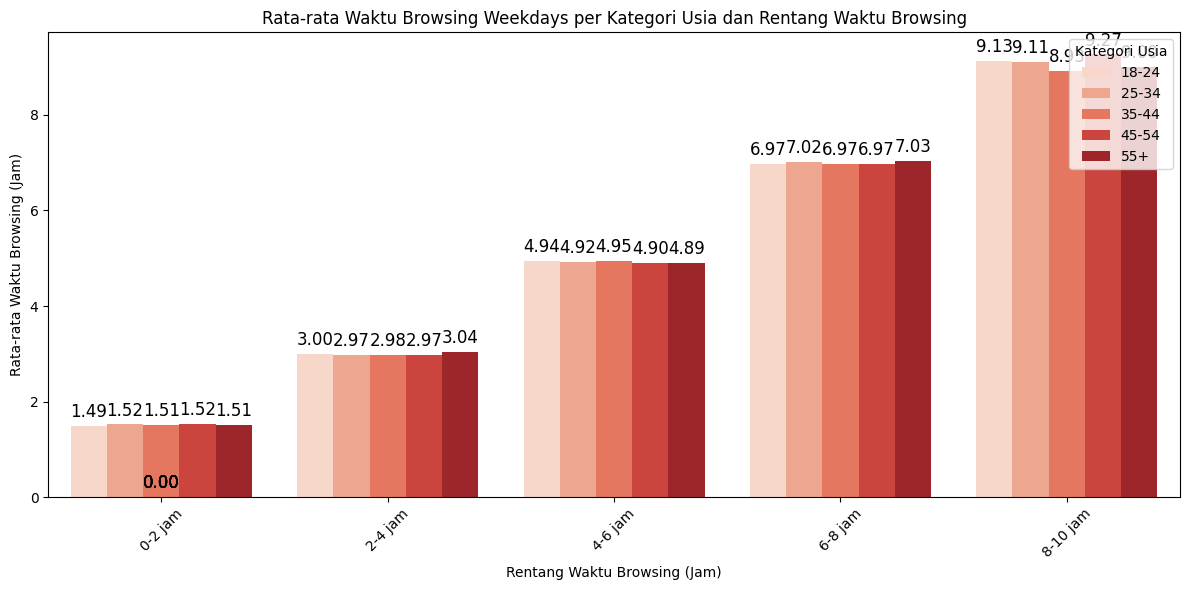

In [57]:
rata_rata_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekday_Range'])['Browsing_Hours_Weekday'].mean().reset_index(name='Rata-rata Waktu Browsing')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Browsing_Hours_Weekday_Range', y='Rata-rata Waktu Browsing', hue='Age_Group',palette='Reds', data=rata_rata_per_kategori_dan_rentang)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Rata-rata Waktu Browsing Weekdays per Kategori Usia dan Rentang Waktu Browsing')
plt.xlabel('Rentang Waktu Browsing (Jam)')
plt.ylabel('Rata-rata Waktu Browsing (Jam)')
plt.legend(title='Kategori Usia', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Median Browsing Hours Weekday

<ipython-input-72-5b81c688fdc0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekday_Range'])['Browsing_Hours_Weekday'].median().reset_index(name='Median Waktu Browsing')


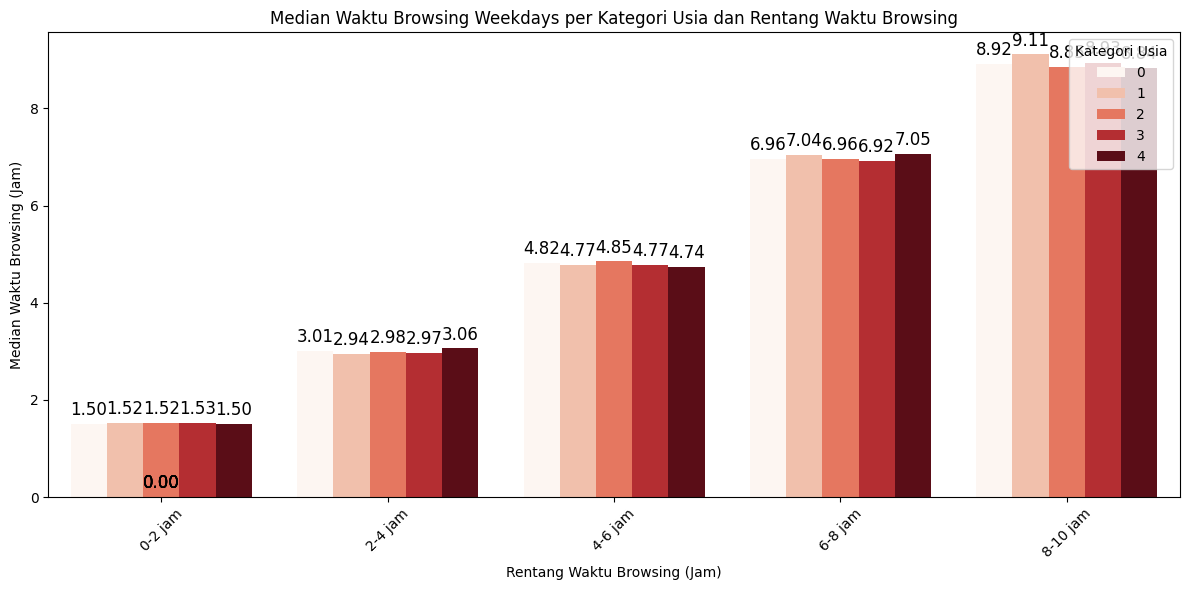

In [72]:
median_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekday_Range'])['Browsing_Hours_Weekday'].median().reset_index(name='Median Waktu Browsing')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Browsing_Hours_Weekday_Range', y='Median Waktu Browsing', hue='Age_Group',palette='Reds', data=median_per_kategori_dan_rentang)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Median Waktu Browsing Weekdays per Kategori Usia dan Rentang Waktu Browsing')
plt.xlabel('Rentang Waktu Browsing (Jam)')
plt.ylabel('Median Waktu Browsing (Jam)')
plt.legend(title='Kategori Usia', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Connection between Browsing Hours Weekend and Age

<ipython-input-77-df585c622a62>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jumlah_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekend_Range']).size().reset_index(name='Jumlah Orang')


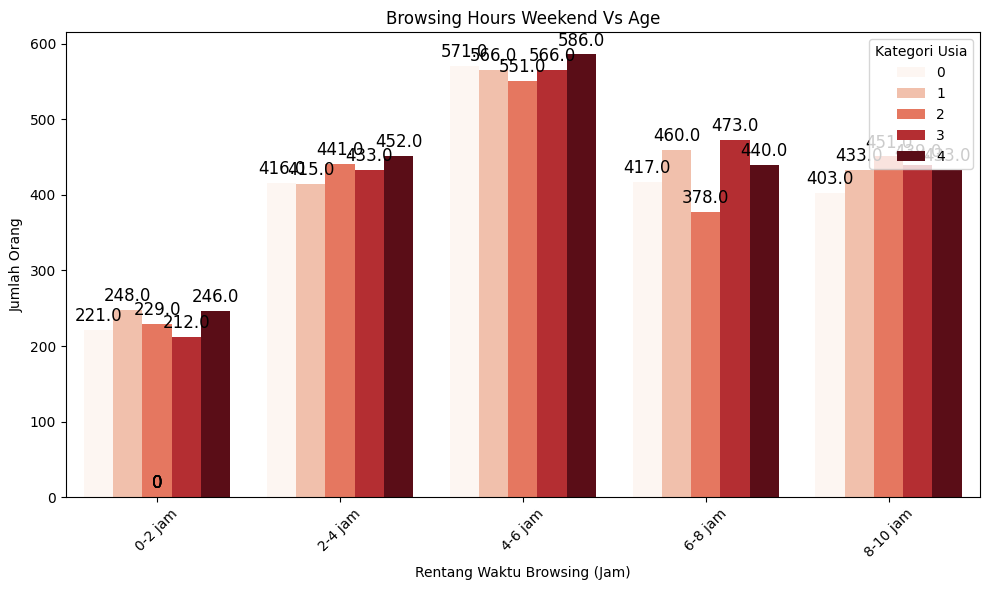

In [77]:
data['Browsing_Hours_Weekend'] = pd.to_numeric(data['Browsing_Hours_Weekend'], errors='coerce')
data = data.dropna(subset=['Browsing_Hours_Weekend'])

# Range Browsing Weekend
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2 jam','2-4 jam', '4-6 jam', '6-8 jam', '8-10 jam']
data['Browsing_Hours_Weekend_Range'] = pd.cut(data['Browsing_Hours_Weekend'], bins=bins, labels=labels)

jumlah_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekend_Range']).size().reset_index(name='Jumlah Orang')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Browsing_Hours_Weekend_Range', y='Jumlah Orang', hue='Age_Group',palette='Reds', data=jumlah_per_kategori_dan_rentang)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Browsing Hours Weekend Vs Age')
plt.xlabel('Rentang Waktu Browsing (Jam)')
plt.ylabel('Jumlah Orang')
plt.legend(title='Kategori Usia', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [74]:
outliers = data[data['Browsing_Hours_Weekend'] >= 11]
jumlah_outliers_per_kategori = outliers.groupby('Age_Group').size()

# Menampilkan hasil jumlah orang per kategori usia
print("Jumlah Orang per Kategori Usia yang Memiliki Browsing Lebih dari 10 Jam:")
print(jumlah_outliers_per_kategori)

# Menampilkan data outlier beserta kategori usia

Jumlah Orang per Kategori Usia yang Memiliki Browsing Lebih dari 10 Jam:
Age_Group
0    9
1    2
2    5
3    7
4    4
dtype: int64


Mean Browsing Hours Weekend

<ipython-input-79-fd1b1fcb65d5>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rata_rata_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekday_Range'])['Browsing_Hours_Weekend'].mean().reset_index(name='Rata-rata Waktu Browsing')


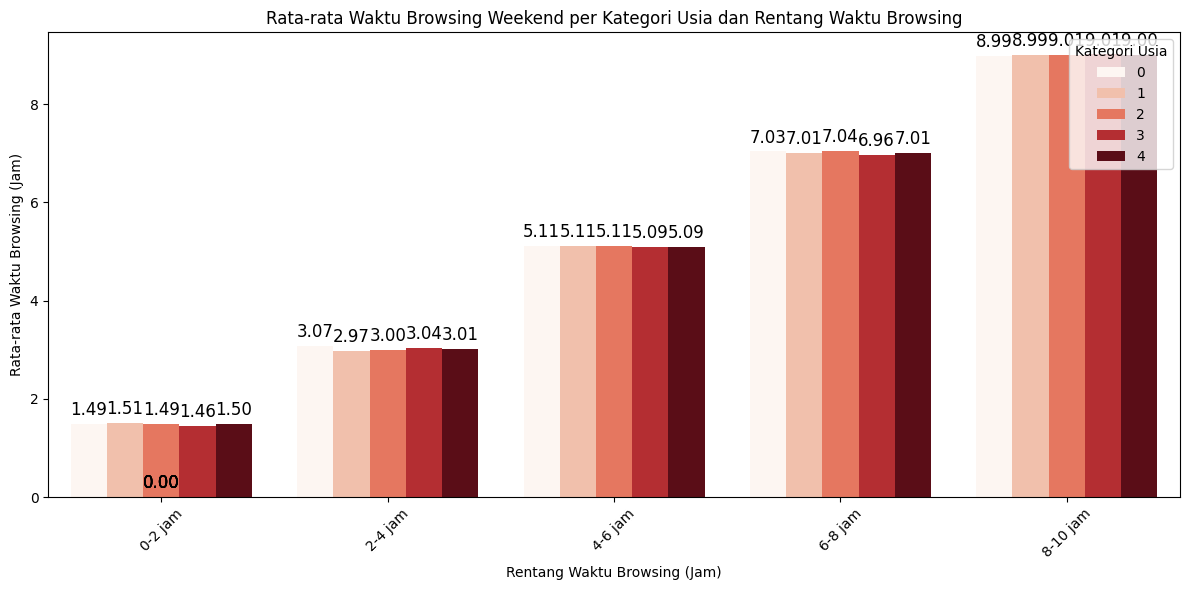

In [79]:
data['Browsing_Hours_Weekend'] = pd.to_numeric(data['Browsing_Hours_Weekend'], errors='coerce')
data = data.dropna(subset=['Browsing_Hours_Weekend'])

bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2 jam','2-4 jam', '4-6 jam', '6-8 jam', '8-10 jam']
data['Browsing_Hours_Weekday_Range'] = pd.cut(data['Browsing_Hours_Weekend'], bins=bins, labels=labels)

rata_rata_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekday_Range'])['Browsing_Hours_Weekend'].mean().reset_index(name='Rata-rata Waktu Browsing')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Browsing_Hours_Weekday_Range', y='Rata-rata Waktu Browsing', hue='Age_Group',palette='Reds', data=rata_rata_per_kategori_dan_rentang)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Rata-rata Waktu Browsing Weekend per Kategori Usia dan Rentang Waktu Browsing')
plt.xlabel('Rentang Waktu Browsing (Jam)')
plt.ylabel('Rata-rata Waktu Browsing (Jam)')
plt.legend(title='Kategori Usia', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Median Browsing Hours Weekend

<ipython-input-80-ad821f2d5360>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekday_Range'])['Browsing_Hours_Weekend'].median().reset_index(name='Median Waktu Browsing')


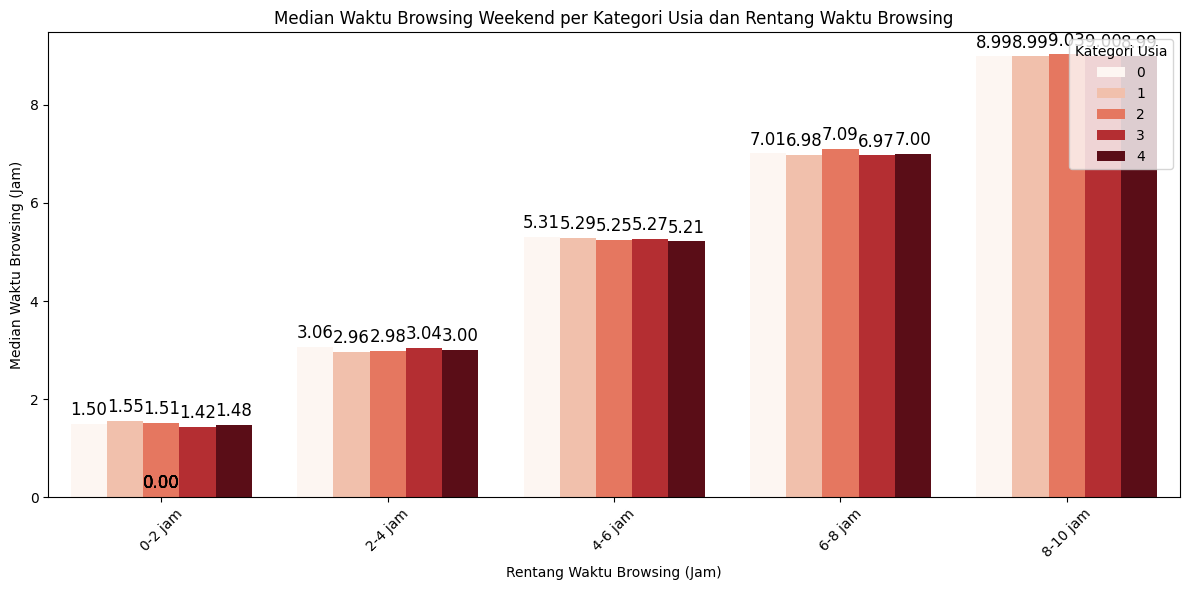

In [80]:
median_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekday_Range'])['Browsing_Hours_Weekend'].median().reset_index(name='Median Waktu Browsing')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Browsing_Hours_Weekday_Range', y='Median Waktu Browsing', hue='Age_Group', palette='Reds', data=median_per_kategori_dan_rentang)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Median Waktu Browsing Weekend per Kategori Usia dan Rentang Waktu Browsing')
plt.xlabel('Rentang Waktu Browsing (Jam)')
plt.ylabel('Median Waktu Browsing (Jam)')
plt.legend(title='Kategori Usia', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Browsing Ratio Vs Age Group

Browsing_Ratio
0.820652    170
1.000000     11
1.500000      7
0.500000      5
0.583333      5
           ... 
1.748366      1
0.925065      1
0.736364      1
0.545547      1
2.199029      1
Name: count, Length: 9886, dtype: int64


<ipython-input-61-f8718fb31f5f>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group')


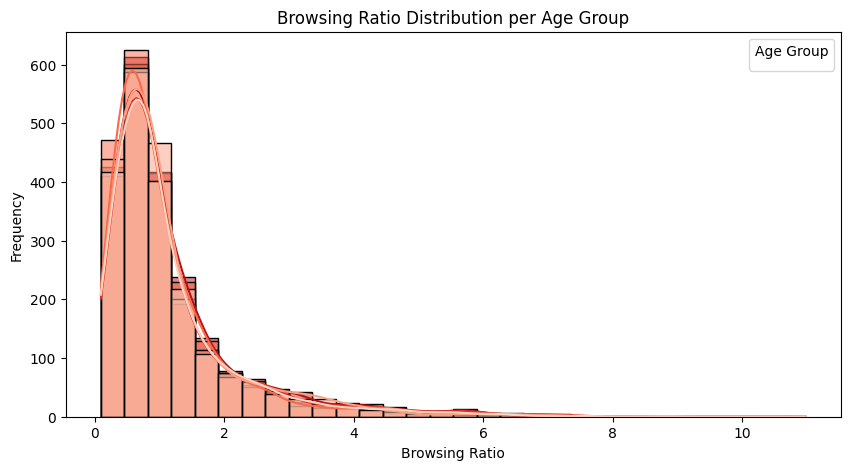

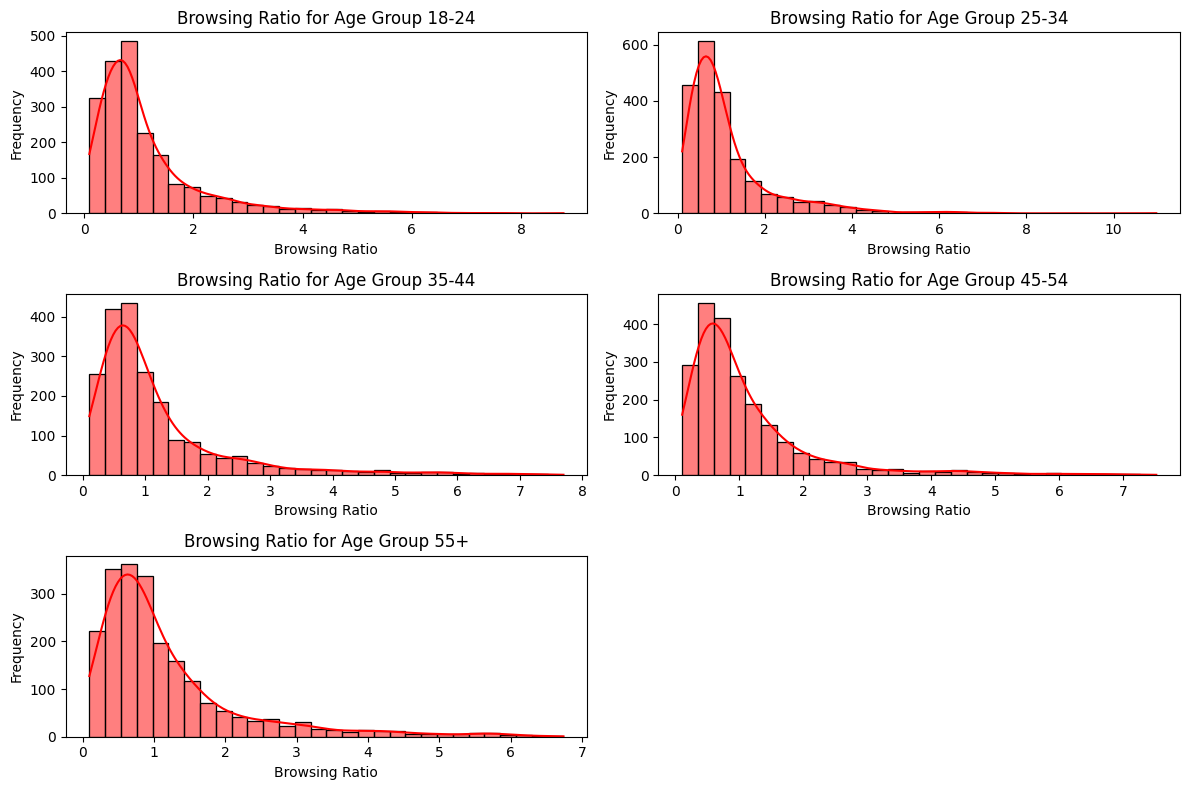

In [61]:
data['Browsing_Ratio'] = data['Browsing_Hours_Weekday'] / data['Browsing_Hours_Weekend']
print(data['Browsing_Ratio'].value_counts())

plt.figure(figsize=(10,5))
sns.histplot(data=data, x='Browsing_Ratio', hue='Age_Group', bins=30, kde=True, palette='Reds')

plt.xlabel('Browsing Ratio')
plt.ylabel('Frequency')
plt.title('Browsing Ratio Distribution per Age Group')
plt.legend(title='Age Group')
plt.show()

age_groups = ['18-24', '25-34', '35-44', '45-54', '55+']
plt.figure(figsize=(12,8))

for i, age_group in enumerate(age_groups, 1):
    plt.subplot(3,2,i)
    sns.histplot(data=data[data['Age_Group'] == age_group], x='Browsing_Ratio', bins=30, kde=True, color='red')
    plt.title(f'Browsing Ratio for Age Group {age_group}')
    plt.xlabel('Browsing Ratio')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<ipython-input-62-356bcfeee1be>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekend_Range'])['Browsing_Ratio'].mean().reset_index(name='Browsing_Ratio_Avg')


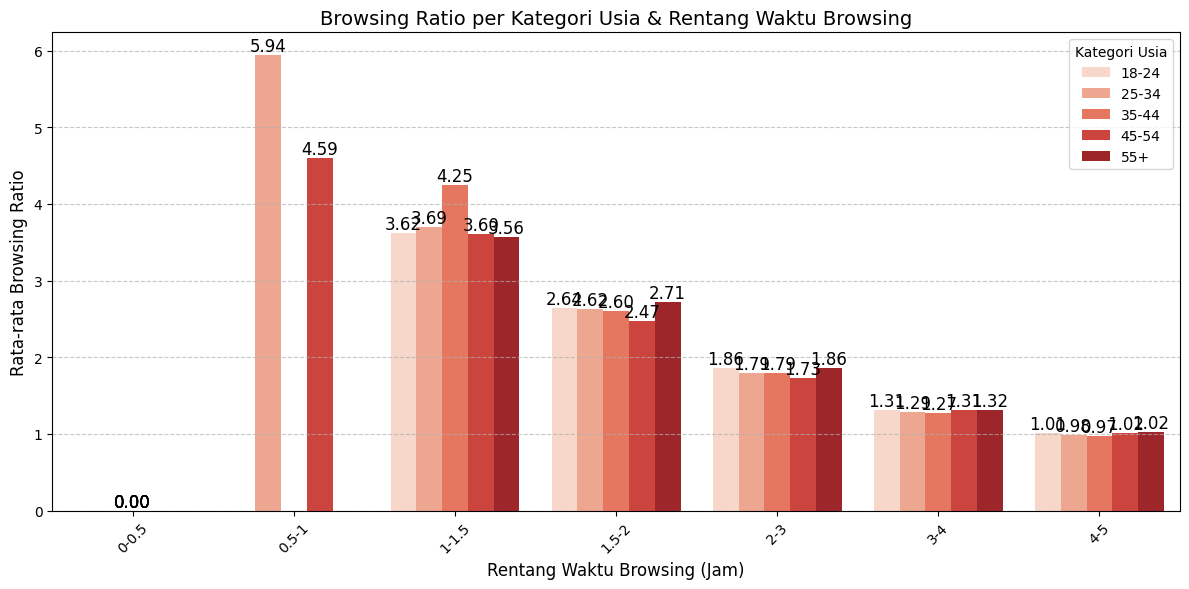

In [62]:
data['Browsing_Hours_Weekend'] = pd.to_numeric(data['Browsing_Hours_Weekend'], errors='coerce')
data['Browsing_Hours_Weekday'] = pd.to_numeric(data['Browsing_Hours_Weekday'], errors='coerce')

data = data.dropna(subset=['Browsing_Hours_Weekend', 'Browsing_Hours_Weekday'])
data['Browsing_Ratio'] = data['Browsing_Hours_Weekday'] / data['Browsing_Hours_Weekend']

bins = [0, 0.5, 1, 1.5, 2, 3, 4, 5]
labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-3', '3-4', '4-5']
data['Browsing_Hours_Weekend_Range'] = pd.cut(data['Browsing_Hours_Weekend'], bins=bins, labels=labels)

ratio_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Browsing_Hours_Weekend_Range'])['Browsing_Ratio'].mean().reset_index(name='Browsing_Ratio_Avg')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Browsing_Hours_Weekend_Range',
                 y='Browsing_Ratio_Avg',
                 hue='Age_Group',
                 data=ratio_per_kategori_dan_rentang,
                 palette='Reds')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Browsing Ratio per Kategori Usia & Rentang Waktu Browsing', fontsize=14)
plt.xlabel('Rentang Waktu Browsing (Jam)', fontsize=12)
plt.ylabel('Rata-rata Browsing Ratio', fontsize=12)
plt.legend(title='Kategori Usia', loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Connection between Data Usage and Age

<ipython-input-64-abf7138d8dd2>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jumlah_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Data_Usage_MB_Range']).size().reset_index(name='Jumlah Orang')


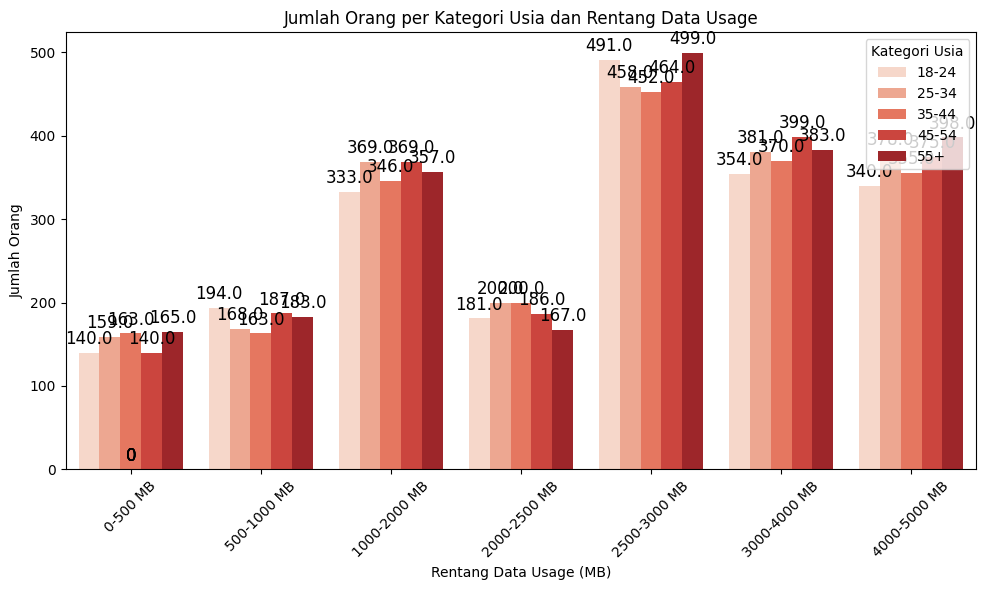

In [64]:
data['Data_Usage_MB'] = pd.to_numeric(data['Data_Usage_MB'], errors='coerce')
data = data.dropna(subset=['Data_Usage_MB'])

bins = [0, 500, 1000, 2000, 2500, 3000, 4000, 5000]
labels = ['0-500 MB','500-1000 MB', '1000-2000 MB', '2000-2500 MB', '2500-3000 MB', '3000-4000 MB', '4000-5000 MB']
data['Data_Usage_MB_Range'] = pd.cut(data['Data_Usage_MB'], bins=bins, labels=labels)
jumlah_per_kategori_dan_rentang = data.groupby(['Age_Group', 'Data_Usage_MB_Range']).size().reset_index(name='Jumlah Orang')


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Data_Usage_MB_Range', y='Jumlah Orang', hue='Age_Group', palette='Reds', data=jumlah_per_kategori_dan_rentang)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Jumlah Orang per Kategori Usia dan Rentang Data Usage')
plt.xlabel('Rentang Data Usage (MB)')
plt.ylabel('Jumlah Orang')
plt.legend(title='Kategori Usia', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [65]:
outliers = data[(data['Data_Usage_MB'] >= 5000)]

jumlah_outliers_per_kategori = outliers.groupby('Age_Group').size()

print("Jumlah Orang per Kategori Usia yang Memiliki Data Usage antara 5000 MB dan 6000 MB:")
print(jumlah_outliers_per_kategori)

Jumlah Orang per Kategori Usia yang Memiliki Data Usage antara 5000 MB dan 6000 MB:
Age_Group
18-24     5
25-34    13
35-44     7
45-54    12
55+       9
dtype: int64


# *MODEL HEURISTIC*

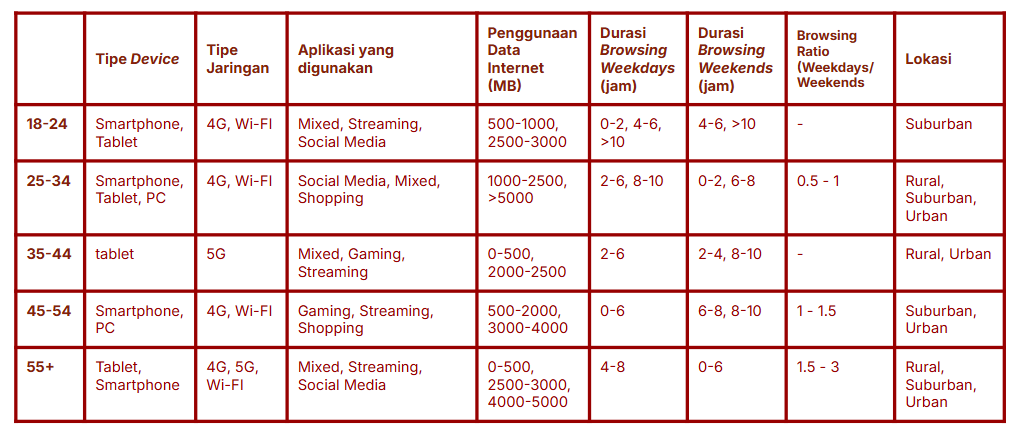

Heuristic Model Accuracy: 0.21

Classification Report for Heuristic Model:
              precision    recall  f1-score   support

       18-24       0.00      0.00      0.00      2038
       25-34       0.00      0.00      0.00      2126
       35-44       0.00      0.00      0.00      2056
       45-54       0.24      0.07      0.10      2132
         55+       0.21      0.96      0.34      2161

    accuracy                           0.21     10513
   macro avg       0.09      0.20      0.09     10513
weighted avg       0.09      0.21      0.09     10513



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


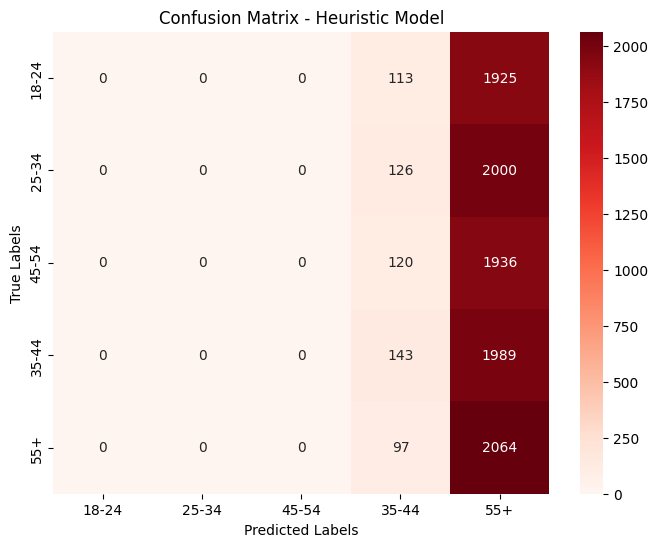

In [66]:
def heuristic_model(row):
    # Usia 55+
    if row['Device_Type'] in ['Smartphone', 'Tablet'] or row['Network_Type'] in ['4g', '5g', 'Wi-Fi'] or \
         (row['App_Categories_Used'] in ['Mixed', 'Streaming', 'Social Media']) or \
         (0 <= row['Data_Usage_MB'] <= 500 or 2500 <= row['Data_Usage_MB'] <= 3000 or 4000 <= row['Data_Usage_MB'] <= 5000) or \
         (row['Browsing_Hours_Weekday'] in ['4-8']) or \
         (row['Browsing_Hours_Weekend'] in ['0-6']) or \
         (1.5 <= row['Browsing_Ratio'] <= 3) or \
         row['Region'] in ['Rural', 'Suburban', 'Urban']:
         return '55+'

    # Usia 45-54
    if row['Device_Type'] in ['Smartphone', 'PC'] or row['Network_Type'] in ['4g', 'Wi-Fi'] or \
         row['App_Categories_Used'] in ['Gaming', 'Streaming', 'Shopping'] or \
         ((500 <= row['Data_Usage_MB'] <= 2000) or (3000 <= row['Data_Usage_MB'] <= 4000)) or \
         (row['Browsing_Hours_Weekday'] in ['0-6']) or \
         (row['Browsing_Hours_Weekend'] in ['6-8', '8-10']) or \
         (1 <= row['Browsing_Ratio'] <= 1.5) or \
         row['Region'] in ['Suburban', 'Urban']:
         return '45-54'

    # Usia 35-44
    if row['Device_Type'] in ['Tablet'] or row['Network_Type'] in ['5g'] or \
         (row['App_Categories_Used'] in ['Streaming', 'Gaming', 'Mixed']) or \
         (0 <= row['Data_Usage_MB'] <= 500 or 2000 <= row['Data_Usage_MB'] <= 2500) or \
         (row['Browsing_Hours_Weekday'] in ['2-6']) or \
         (row['Browsing_Hours_Weekend'] in ['2-4', '8-10']) or \
         row['Region'] in ['Rural', 'Urban']:
         return '35-44'

    # Usia 25-34
    if row['Device_Type'] in ['Smartphone', 'Tablet', 'PC'] or row['Network_Type'] in ['4g', 'Wi-Fi'] or \
         (row['App_Categories_Used'] in ['Shopping', 'Social Media', 'Mixed']) or \
         (1000 <= row['Data_Usage_MB'] <= 2500 or row['Data_Usage_MB'] > 5000) or \
         (row['Browsing_Hours_Weekday'] in ['2-6', '8-10']) or \
         (row['Browsing_Hours_Weekend'] in ['0-2', '6-8']) or \
         (0.5 <= row['Browsing_Ratio'] <= 1) or \
         row['Region'] in ['Rural', 'Suburban', 'Urban']:
         return '25-34'

    # 18-24
    if row['Device_Type'] in ['Smartphone', 'Tablet'] or row['Network_Type'] in ['4g', 'Wi-Fi'] or \
       (row['App_Categories_Used'] in ['Streaming', 'Social Media', 'Mixed']) or \
       ((500 <= row['Data_Usage_MB'] <= 1000) or (2500 <= row['Data_Usage_MB'] <= 3000)) or \
       (row['Browsing_Hours_Weekday'] in ['0-2', '4-6', '>10']) or \
       (row['Browsing_Hours_Weekend'] in ['4-6', '>10']) or \
       row['Region'] in ['Suburban']:
        return '18-24'

    # Default: Jika tidak memenuhi aturan, pilih kategori terbanyak (mode)
    else:
        return data['Age_Group'].mode()[0]

# Model Heuristic
data['Predicted_Age_Group'] = data.apply(heuristic_model, axis=1)

# Akurasi Model
accuracy = (data['Predicted_Age_Group'] == data['Age_Group']).mean()
print(f'Heuristic Model Accuracy: {accuracy:.2f}')

# Classification Report
print("\nClassification Report for Heuristic Model:")
print(classification_report(data['Age_Group'], data['Predicted_Age_Group']))

# Confusion Matrix
conf_matrix = confusion_matrix(data['Age_Group'], data['Predicted_Age_Group'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=data['Age_Group'].unique(), yticklabels=data['Age_Group'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Heuristic Model')
plt.show()

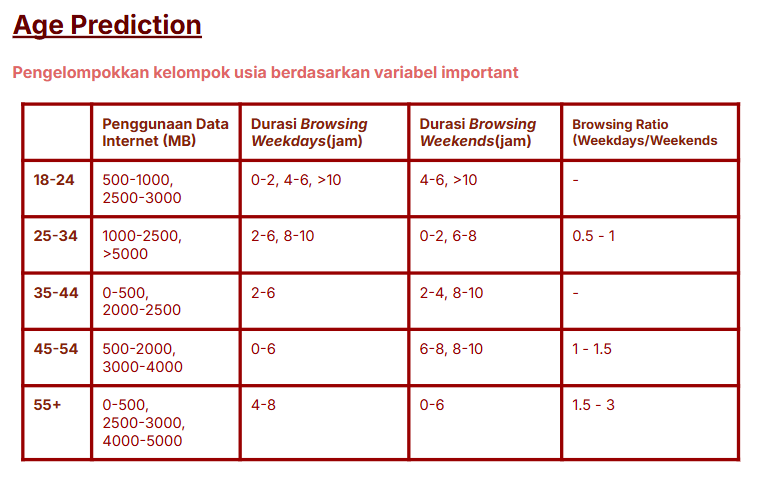

Heuristic Model Accuracy: 0.2121

Classification Report for Heuristic Model:
              precision    recall  f1-score   support

       18-24       0.00      0.00      0.00      2038
       25-34       0.28      0.00      0.01      2126
       35-44       0.21      0.06      0.10      2056
       45-54       0.21      0.40      0.27      2132
         55+       0.21      0.58      0.31      2161

    accuracy                           0.21     10513
   macro avg       0.18      0.21      0.14     10513
weighted avg       0.18      0.21      0.14     10513



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


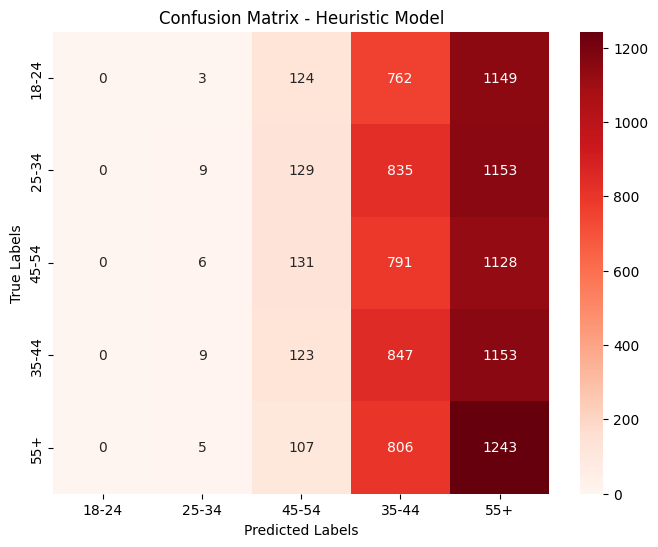

In [67]:
def heuristic_model(row):
    # Usia 55+
    if (row['Browsing_Hours_Weekday'] in ['4-8']) or \
       (row['Browsing_Hours_Weekend'] in ['0-6']) or \
       (1.5 <= row['Browsing_Ratio'] <= 3) or \
       (0 <= row['Data_Usage_MB'] <= 500 or 2500 <= row['Data_Usage_MB'] <= 3000 or 4000 <= row['Data_Usage_MB'] <= 5000) :
       return '55+'

    # Usia 45-54
    elif (row['Browsing_Hours_Weekday'] in ['0-6']) or \
         (row['Browsing_Hours_Weekend'] in ['6-8', '8-10']) or \
         (1 <= row['Browsing_Ratio'] <= 1.5) or \
         ((500 <= row['Data_Usage_MB'] <= 2000) or (3000 <= row['Data_Usage_MB'] <= 4000)):
        return '45-54'

    # Usia 35-44
    elif (row['Browsing_Hours_Weekday'] in ['2-6']) or \
         (row['Browsing_Hours_Weekend'] in ['2-4', '8-10']) or \
         (0 <= row['Data_Usage_MB'] <= 500 or 2000 <= row['Data_Usage_MB'] <= 2500) :
        return '35-44'

    # Usia 25-34
    elif (row['Browsing_Hours_Weekday'] in ['2-6', '8-10']) or \
         (row['Browsing_Hours_Weekend'] in ['0-2', '6-8']) or \
         (0.5 <= row['Browsing_Ratio'] <= 1) or \
         (1000 <= row['Data_Usage_MB'] <= 2500 or row['Data_Usage_MB'] > 5000) :
        return '25-34'

    # 18-24
    if (row['Browsing_Hours_Weekday'] in ['0-2', '4-6', '>10']) or \
       (row['Browsing_Hours_Weekend'] in ['4-6', '>10']) or \
       ((500 <= row['Data_Usage_MB'] <= 1000) or (2500 <= row['Data_Usage_MB'] <= 3000)) :
       return '18-24'


    # Default: Jika tidak memenuhi aturan, pilih kategori terbanyak (mode)
    else:
        return data['Age_Group'].mode()[0]

# Model Heuristic
data['Predicted_Age_Group'] = data.apply(heuristic_model, axis=1)

# Akurasi Model
accuracy = (data['Predicted_Age_Group'] == data['Age_Group']).mean()
print(f'Heuristic Model Accuracy: {accuracy:.4f}')

# Classification Report
print("\nClassification Report for Heuristic Model:")
print(classification_report(data['Age_Group'], data['Predicted_Age_Group']))

# Confusion Matrix
conf_matrix = confusion_matrix(data['Age_Group'], data['Predicted_Age_Group'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=data['Age_Group'].unique(), yticklabels=data['Age_Group'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Heuristic Model')
plt.show()

# *MODEL MACHINE LEARNING*

<ipython-input-68-a77f48c9d59b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Device_Type'] = le.fit_transform(X['Device_Type'])
<ipython-input-68-a77f48c9d59b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Network_Type'] = le.fit_transform(X['Network_Type'])
<ipython-input-68-a77f48c9d59b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

                  Feature  Importance
5  Browsing_Hours_Weekend    0.259443
4  Browsing_Hours_Weekday    0.258877
3           Data_Usage_MB    0.248186
2     App_Categories_Used    0.072377
0             Device_Type    0.061899
1            Network_Type    0.051194
6                  Region    0.048023


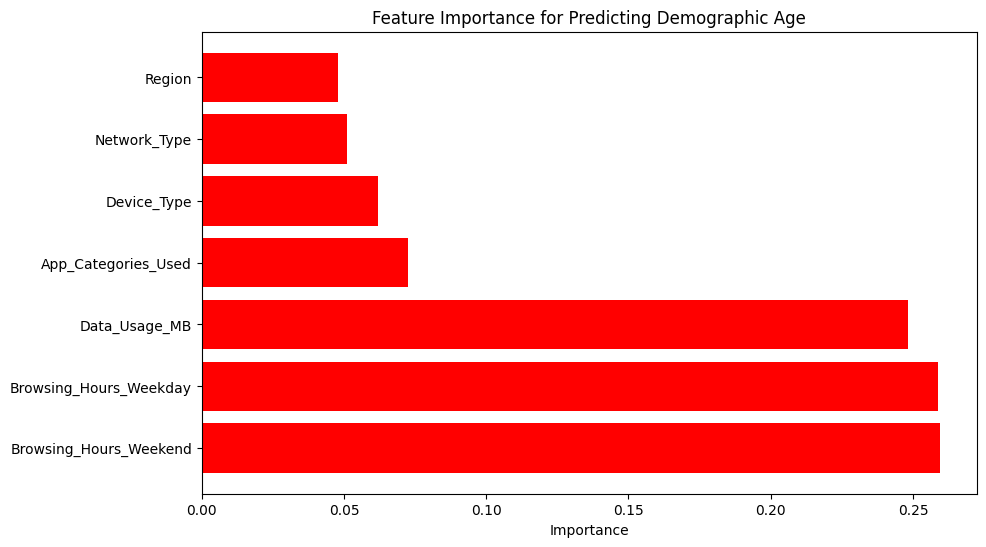

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Memisahkan fitur (X) dan target (y)
X = data[['Device_Type', 'Network_Type', 'App_Categories_Used', 'Data_Usage_MB',
          'Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Region']]
y = data['Age_Group']

# Encoding variabel kategorikal
le = LabelEncoder()

# Mengubah kolom kategorikal ke dalam format numerik
X['Device_Type'] = le.fit_transform(X['Device_Type'])
X['Network_Type'] = le.fit_transform(X['Network_Type'])
X['App_Categories_Used'] = le.fit_transform(X['App_Categories_Used'])
X['Browsing_Hours_Weekday'] = le.fit_transform(X['Browsing_Hours_Weekday'])
X['Browsing_Hours_Weekend'] = le.fit_transform(X['Browsing_Hours_Weekend'])
X['Region'] = le.fit_transform(X['Region'])

# Model Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importances (Variabel Penting)
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='Red')
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting Demographic Age')
plt.show()


Random Forest Accuracy: 0.2073

Random Forest Classification Report:
              precision    recall  f1-score   support

       18-24       0.19      0.25      0.22       408
       25-34       0.22      0.19      0.20       425
       35-44       0.20      0.18      0.19       411
       45-54       0.23      0.24      0.24       427
         55+       0.20      0.17      0.18       432

    accuracy                           0.21      2103
   macro avg       0.21      0.21      0.21      2103
weighted avg       0.21      0.21      0.21      2103



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:45:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.2116

XGBoost Classification Report:
              precision    recall  f1-score   support

       18-24       0.19      0.20      0.20       408
       25-34       0.22      0.22      0.22       425
       35-44       0.22      0.22      0.22       411
       45-54       0.19      0.19      0.19       427
         55+       0.23      0.23      0.23       432

    accuracy                           0.21      2103
   macro avg       0.21      0.21      0.21      2103
weighted avg       0.21      0.21      0.21      2103



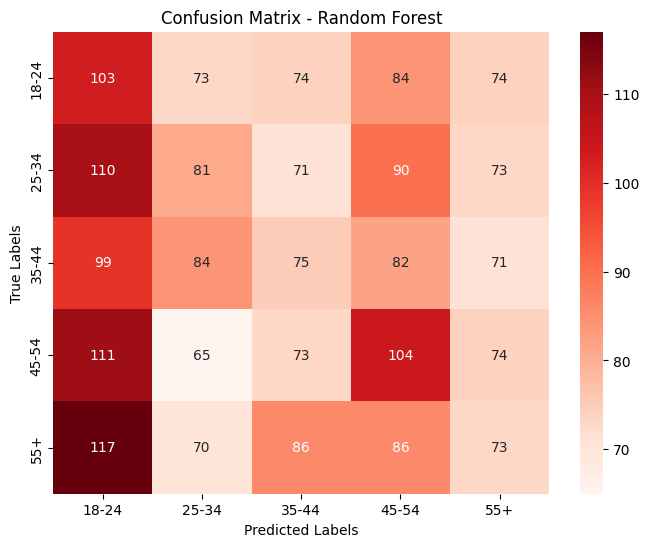

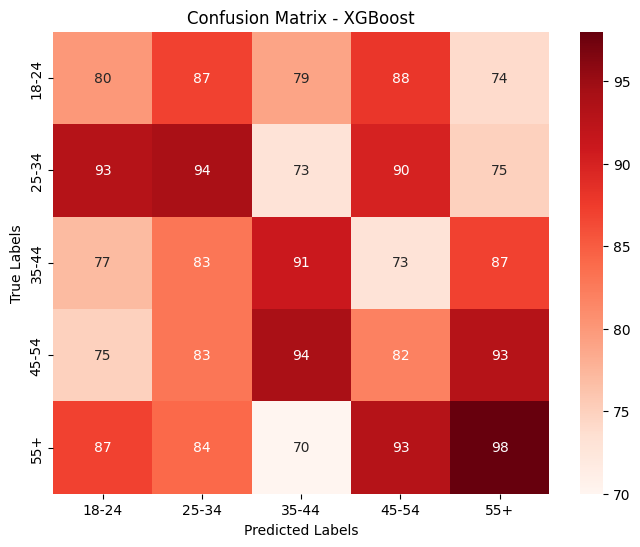

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Encode Target Variable (`Age_Group`)
y_label_encoder = LabelEncoder()
data['Age_Group'] = y_label_encoder.fit_transform(data['Age_Group'])

# Encode Categorical Features (Ubah kategori ke angka)
categorical_columns = ['App_Categories_Used', 'Network_Type', 'Region']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Pisahkan Fitur (X) dan Target (y)
X = data[['Network_Type', 'App_Categories_Used', 'Data_Usage_MB',
          'Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Region']]
y = data['Age_Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE untuk Menyeimbangkan Data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict dengan Random Forest
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=[str(cls) for cls in y_label_encoder.classes_]))

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_balanced, y_train_balanced)

# Predict dengan XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=[str(cls) for cls in y_label_encoder.classes_]))

# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=[str(cls) for cls in y_label_encoder.classes_],
                yticklabels=[str(cls) for cls in y_label_encoder.classes_])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plot Confusion Matrices
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
